In [390]:
import pandas as pd

df = pd.read_excel('Berlin_accidents_clean.xlsx')
df

,id,land,district,year,month,hour,day_of_week,accident_category,accident_details,accident_type,light_condition,acc_with_bike,acc_with_car,acc_with_ped,acc_with_motobike,acc_with_truck,acc_with_other,road_condition,longitude,latitude
0,219249,11,3,2021,11,18,2,3,0,3,2,0,1,0,1,0,0,1,13.426895,52.533940
1,219248,11,7,2021,12,19,7,3,6,2,2,0,1,1,0,0,0,1,13.392090,52.439951
2,219247,11,4,2021,12,17,4,3,5,2,2,0,1,0,0,0,0,0,13.326242,52.538028
3,219246,11,4,2021,12,15,7,3,5,2,1,0,1,0,1,0,0,1,13.316521,52.499534
4,219243,11,11,2021,12,9,5,3,3,6,0,0,1,0,0,0,1,2,13.525752,52.493867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,112174,11,4,2021,3,16,4,3,6,2,0,0,1,1,0,0,0,1,13.296345,52.511008
11262,111541,11,4,2021,1,1,6,3,9,1,2,0,1,0,0,0,0,0,13.289496,52.493813
11263,110370,11,3,2021,1,20,1,3,3,6,2,0,1,0,0,0,0,1,13.423095,52.527534
11264,109998,11,7,2021,1,14,7,3,2,6,0,0,1,0,0,0,0,1,13.359259,52.474367


In [391]:
#X, y split
y=pd.DataFrame(df['accident_category'])
#X=data_num
X=df[['district','month', 'hour','day_of_week','accident_details', 'accident_type','light_condition','acc_with_bike',
                 'acc_with_car', 'acc_with_ped','acc_with_motobike', 'acc_with_truck','acc_with_other', 'road_condition']].copy()
X


,district,month,hour,day_of_week,accident_details,accident_type,light_condition,acc_with_bike,acc_with_car,acc_with_ped,acc_with_motobike,acc_with_truck,acc_with_other,road_condition
0,3,11,18,2,0,3,2,0,1,0,1,0,0,1
1,7,12,19,7,6,2,2,0,1,1,0,0,0,1
2,4,12,17,4,5,2,2,0,1,0,0,0,0,0
3,4,12,15,7,5,2,1,0,1,0,1,0,0,1
4,11,12,9,5,3,6,0,0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,4,3,16,4,6,2,0,0,1,1,0,0,0,1
11262,4,1,1,6,9,1,2,0,1,0,0,0,0,0
11263,3,1,20,1,3,6,2,0,1,0,0,0,0,1
11264,7,1,14,7,2,6,0,0,1,0,0,0,0,1


In [392]:
# Import the required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [393]:
# Split the data into a training set and a test set.
TT_SPLIT = 0.2     # ratio train/test size #proportion test set split
RAND_STATE = 123   # specifies a sampling for repeatable results
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

In [394]:
y_test

,accident_category
10,3
4791,3
7541,3
715,3
1637,2
...,...
11076,3
7603,3
6966,3
5991,3


In [395]:
df['accident_category'].value_counts() # My dataset is very unbalanced.

3    9581
2    1654
1      31
Name: accident_category, dtype: int64

In [396]:
# Upsampling using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

accident_category
3                    7676
2                    7676
1                    7676
dtype: int64

In [369]:
#Balancing the classes
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_sm, y_sm)

X_train_res = pd.DataFrame(X_train_res, columns= X_train.columns)
y_train_res = pd.DataFrame(y_train_res, columns =['accident_category'])

In [370]:
y_train_res.value_counts() #now we have a balanced data

accident_category
3                    7676
2                    7676
1                    7676
dtype: int64

#Cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB



parameters = {
    "max_depth": [10, 20, 30],   #level of decision tree
    "min_samples_leaf": [5, 8, 10],
    "max_features": [None, "sqrt", "log2"], #number of columns
    "n_estimators": [50, 100, 150], #number of decision trees
    "bootstrap": [True, False], 
    "oob_score": [True, False],
    "random_state": [RAND_STATE]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, parameters, cv=5)
grid_search.fit(X_train_res, y_train_res['accident_category'])

print("Best parameters:", grid_search.best_params_)
print("Validation accuracy:", grid_search.best_score_)


Result:  
Best parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 150, 'oob_score': False, 'random_state': 123}
Validation accuracy: 0.8796706557042387


In [397]:
#Model using SMOTE data

from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":30,   #level of decision tree
           "min_samples_leaf":5, 
           "max_features":'sqrt', #number of columns
           "n_estimators":150, #number of decision trees
           "bootstrap":False, 
           "oob_score":False,
           "random_state":123}


rf = RandomForestClassifier(**parameters)
rf.fit(X_sm, y_sm['accident_category'])


print("train prediction accuracy score: %.2f" %(rf.score(X_sm, y_sm)))
print("test prediction accuracy score: %.2f"  %(rf.score(X_sm, y_sm)))

train prediction accuracy score: 0.94
test prediction accuracy score: 0.94


In [371]:
#Best parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 150, 'oob_score': False, 'random_state': 123}
#Validation accuracy: 0.8796706557042387

#Trying best parameters from cv

from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":30,   #level of decision tree
           "min_samples_leaf":5, 
           "max_features":'sqrt', #number of columns
           "n_estimators":150, #number of decision trees
           "bootstrap":False, 
           "oob_score":False,
           "random_state":123}

rf = RandomForestClassifier(**parameters)
rf.fit(X_train_res, y_train_res['accident_category'])


print("train prediction accuracy score: %.2f" %(rf.score(X_train_res, y_train_res)))
print("test prediction accuracy score: %.2f"  %(rf.score(X_test, y_test)))







train prediction accuracy score: 0.94
test prediction accuracy score: 0.76


# Random forest

from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":20,   #level of decision tree
           "min_samples_leaf":8, 
           "max_features":None, #number of columns
           "n_estimators":50, #number of decision trees
           "bootstrap":True, 
           "oob_score":True,
           "random_state":RAND_STATE}

rf = RandomForestClassifier(**parameters)
rf.fit(X_train_res, y_train_res['accident_category'])

print("train prediction accuracy score: %.2f" %(rf.score(X_train_res, y_train_res)))
print("test prediction accuracy score: %.2f"  %(rf.score(X_test, y_test)))





In [259]:
y_train_res_pred_rf = rf.predict(X_train_res)
y_test_pred_rf      = rf.predict(X_test)

In [260]:
y_test_pred_rf

array([3, 3, 2, ..., 3, 3, 3], dtype=int64)

In [261]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import accuracy_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Accuracy is: {:.2f}".format(accuracy_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Accuracy is: {:.2f}".format(accuracy_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [262]:
model_performance_class(y_train_res, y_train_res_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Accuracy is: 0.94
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      7676
           2       0.92      0.89      0.91      7676
           3       0.90      0.92      0.91      7676

    accuracy                           0.94     23028
   macro avg       0.94      0.94      0.94     23028
weighted avg       0.94      0.94      0.94     23028

Results obtained for the TEST SET
The Accuracy is: 0.76
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.23      0.24      0.24       341
           3       0.86      0.85      0.86      1905

    accuracy                           0.76      2254
   macro avg       0.36      0.36      0.36      2254
weighted avg       0.76      0.76      0.76      2254



In [381]:
X_test.iloc[:1].copy()

,district,month,hour,day_of_week,accident_details,accident_type,light_condition,acc_with_bike,acc_with_car,acc_with_ped,acc_with_motobike,acc_with_truck,acc_with_other,road_condition
10,11,12,19,3,2,2,2,0,1,0,0,0,0,1


In [387]:
def prediction():
    #t = X_test.iloc[:1].copy()
    t = pd.DataFrame()
    t.iloc[:] = 0
    
    t.at[0, 'district'] = 4
    t.at[0, 'month'] = 1
    t.at[0, 'hour'] = 15
    t.at[0, 'day_of_week'] = 3
    t.at[0, 'accident_details'] = 7
    t.at[0, 'accident_type'] = 3
    t.at[0, 'light_condition'] = 2
    t.at[0, 'acc_with_bike'] = 1
    t.at[0, 'acc_with_car'] = 0
    t.at[0, 'acc_with_ped'] = 0
    t.at[0, 'acc_with_motobike'] = 1
    t.at[0, 'acc_with_truck'] = 0
    t.at[0, 'acc_with_other'] = 0
    t.at[0, 'road_condition'] = 1

    
    severity = rf.predict(t)
    #predicted_severity = severity.argmax() + 1 #to get a single value prediction
    output = f'Predicted severity of the accident is: {severity}'
  
    
    return output
    
    


# Print the predicted severity level and predicted probability
    #print(f'Predicted severity of the accident is: {predicted_severity} with a probability of {predicted_prob:.2f}')
    #severity_prob = rf.predict_proba(t)
    #print("P(severity)={}".format(severity_prob))



In [389]:
prediction()

'Predicted severity of the accident is: [3]'

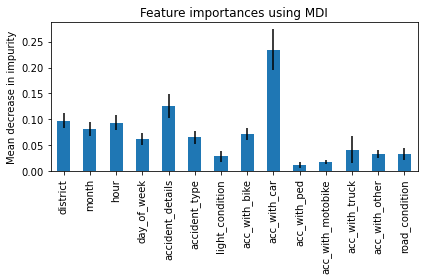

In [267]:
#Feature importance based on mean decrease in impurity
rf = RandomForestClassifier(**parameters)
rf.fit(X_train_res, y_train_res['accident_category'])

#obtaining the feature importance as pandas Series
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train_res.columns)

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) #calculate standaed dev of the feature importances

#Plot
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



In [268]:
#Getting feature importance
importances = rf.feature_importances_
rf.fit(X_train_res, y_train_res['accident_category'])
indices = np.argsort(importances)[::-1] # sort features by importance in descending order
print("Feature ranking:")
for f in range(X_train_res.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train_res.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. acc_with_car (0.233875)
2. accident_details (0.125776)
3. district (0.097708)
4. hour (0.093741)
5. month (0.081520)
6. acc_with_bike (0.071978)
7. accident_type (0.065380)
8. day_of_week (0.062042)
9. acc_with_truck (0.041586)
10. road_condition (0.033702)
11. acc_with_other (0.033243)
12. light_condition (0.028702)
13. acc_with_motobike (0.018400)
14. acc_with_ped (0.012347)
